## 1 - SetUp Environment

In [1]:
import numpy as np
import pandas as pd
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2 - Load Dataframe

now we should load the dataframe that we saved in the previous section.

In [2]:
with open('/content/drive/MyDrive/Python/Regression/Assets/df(1.Final).pickle', 'rb') as file:
    df = pickle.load(file)

df.head(3)

,Year,Month,Week Day,Duration,Cost,Team Member,Height,Frequency,Signal Strength,Antenna Type,Orientation,Power Supply,Zone
0,2019,3,0,241.0,516773.0,12.0,24.0,Very Low Frequencies (VLF),3,Dielectric,Omni-directional,Solar-powered,North
1,2019,10,2,608.0,954888.0,22.0,42.0,Very Low Frequencies (VLF),3,Dielectric,Circular,Active,Center
2,2019,6,5,772.0,932640.0,14.0,43.0,Very High Frequencies (VHF),3,Printed Circuit Board (PCB),Horizontal,Active,Center


## 3 - Find Possible Outliers

first we should make a list for numerical variables. because we just need to analyse outlier for numerical variables.

In [3]:
num_var = ['Duration' , 'Cost' , 'Team Member' , 'Height']

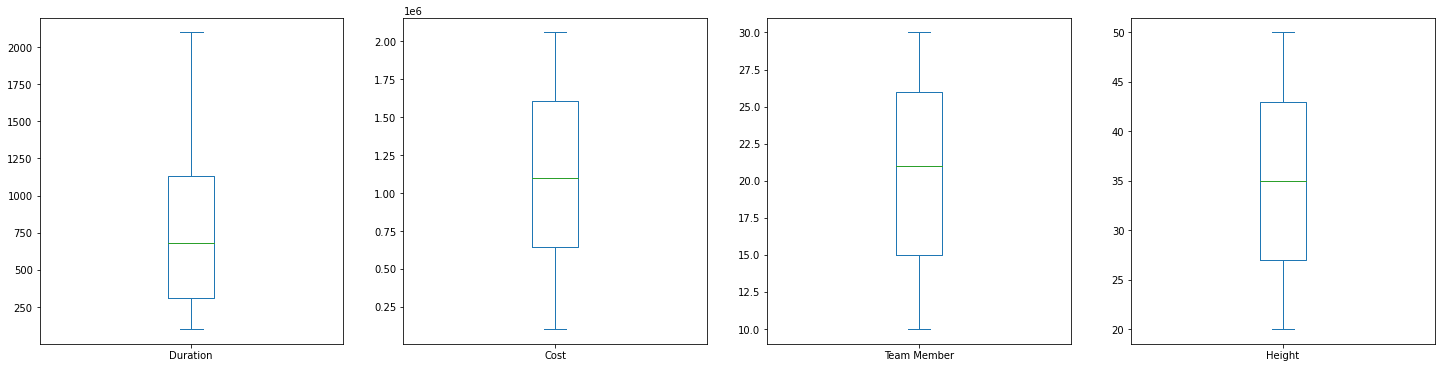

In [4]:
#box plot
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(25, 6))

for i, column in enumerate(num_var):
    ax = axs.flat[i]
    df[column].plot(kind='box',  ax=ax)

plt.show()

the result, shows there is no outlier in none of the variables.

## 4 - See Outliers

Since we don't have any outliers, we do not need to impute. By the way, if we had outlier, before imputing, we would analyse their distribution.

*   if the distribution is normal, we use z-score method
*   if the distribution is not normal (skwed), we use IQR method

thus, let's see the variables' distribution again. however, we have analyzed them in detail in descriptive analysis section.

**Duration** : it has a right skewed distribution. so the method IQR is suitable. </br>
**Cost** : it has a fairly normal distribution. so the method Z-Score is suitable.</br>
**Team Member** : it has a fairly normal distribution. so the method Z-Score is suitable.</br>
**Height** : it has a fairly normal distribution. so the method Z-Score is suitable.

### 4.1 - Use Z-Score

In [5]:
#z score
outliers = []
z_list = []
def detect_outliers(data):
    
    threshold = 3
    mean = df[data].mean()
    std = df[data].std()
    
    for i in range(len(df[data])):
        z_score = (df[data][i] - mean)/std
        z_list.append(z_score)
        
        if abs(z_score) > threshold:
            outliers.append(df[data][i])

    return outliers

In [6]:
print(num_var[1])
detect_outliers(num_var[1])

Cost


[]

In [7]:
print(num_var[2])
detect_outliers(num_var[2])

Team Member


[]

In [8]:
print(num_var[3])
detect_outliers(num_var[3])

Height


[]

As we expected, there is no outlier.

### 4.2 - Use IQR

In [9]:
#quartile
outliers = []
def detect_outliers_quartile(data):
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    
    for i in range(len(df[data])):
        if df[data][i] > upper or df[data][i] < lower:
            outliers.append(df[data][i])

    return outliers

In [10]:
print(num_var[0])
detect_outliers_quartile(num_var[0])

Duration


[]

Finally, there is no outlier in this variable as well.

## impute Outliers

Since we don't have any outlier, we don't need to impute.